# Data Modeling (Using Sklearn and StatsModels)

### Packages use for Analysis

In [138]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn import preprocessing, linear_model, pipeline, metrics
% pylab inline


UsageError: Line magic function `%` not found.


### Import Cleaned Data

In [139]:
df=pd.read_csv('data/Step3_output_clean_df.csv')


In [140]:
df.head()

Unnamed: 0  City_MPG  Highway_MPG          City State                vin  \
0           0        17           24  Indianapolis    IN  1GKKRSED1BJ179334   
1           1        19           29       Fishers    IN  2G1WF5EK1B1155818   
2           2        17           24    BeechGrove    IN  WBAEU334X4PM59833   
3           3        19           25       Fishers    IN  JN8AE2KP4E9106731   
4           4        24           25       Fishers    IN  3N6CM0KN7DK693736   

   price body_style drive_type         engine  ...       make  milage  \
0  14995        SUV        FWD  ['6', '3.6L']  ...        GMC   90440   
1   7894      Sedan        FWD  ['6', '3.5L']  ...  Chevrolet   85961   
2   4200      Sedan        AWD  ['6', '2.5L']  ...        BMW  152000   
3  21200    Minivan        FWD  ['6', '3.5L']  ...     Nissan   40347   
4  10000        Van        FWD  ['4', '2.0L']  ...     Nissan  103728   

     model mpg_city_highway    stock  transmission  year   Region Num_Cyl  \
0   Acadia            17/24   E79334     Automatic  2011  Central       6   
1   Impala            19/29  PV5110A     Automatic  2011  Central       6   
2  3Series            17/24   m59833     Automatic  2004  Central       6   
3    Quest            19/25   18B378     Automatic  2014  Central       6   
4    NV200            24/25   693736     Automatic  2013  Central       4   

  Cyl_Volume  
0        3.6  
1        3.5  
2        2.5  
3        3.5  
4        2.0  

[5 rows x 24 columns]

In [141]:
makes = ['Nissan', 'Toyota', 'Honda']
df.make.isin(makes)
filtered_df = df[df.make.isin(makes)]
filtered_df.shape

(5604, 24)

### Extract Columns required for Analysis: 

In [142]:
cleaned_df = filtered_df[[
    'price', 'milage', 'model', 'make', 'transmission', 'fuel', 'Num_Cyl', 'year', 'body_style']]

In [145]:
cleaned_df.head(10)
#cleaned_df.to_csv ('cleaned_df.csv', index = False, header=True)

price  milage       model    make transmission      fuel  Num_Cyl  year  \
3   21200   40347       Quest  Nissan    Automatic  Gasoline        6  2014   
4   10000  103728       NV200  Nissan    Automatic  Gasoline        4  2013   
14  12918   37792     Corolla  Toyota    Automatic  Gasoline        4  2015   
30   4500  145892      Altima  Nissan    Automatic  Gasoline        4  2008   
31   8488   90958      Accord   Honda       Manual  Gasoline        4  2010   
35  17251   98601       Pilot   Honda    Automatic  Gasoline        6  2013   
37   4750  176200  Highlander  Toyota    Automatic  Gasoline        6  2005   
40  17498   21771      Accord   Honda    Automatic  Gasoline        4  2015   
54  15460   24346        Juke  Nissan    Automatic  Gasoline        4  2015   
56  12300   43183         Fit   Honda       Manual  Gasoline        4  2015   

   body_style  
3     Minivan  
4         Van  
14      Sedan  
30      Sedan  
31      Sedan  
35        SUV  
37        SUV  
40      Sedan  
54        SUV  
56  Hatchback

In [146]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5604 entries, 3 to 26059
Data columns (total 9 columns):
price           5604 non-null int64
milage          5604 non-null int64
model           5604 non-null object
make            5604 non-null object
transmission    5604 non-null object
fuel            5604 non-null object
Num_Cyl         5604 non-null int64
year            5604 non-null int64
body_style      5604 non-null object
dtypes: int64(4), object(5)
memory usage: 437.8+ KB


###  Created a Dataset X (Indipended Variables) and y (Depended Variable) set for Modeling Linear Regression 

In [147]:
sklearn_df=pd.get_dummies(cleaned_df, columns=[ 'model', 'make', 'transmission', 'fuel', 'body_style'],drop_first=True)
sklearn_df.head()
df_sk_y=sklearn_df['price'].div(1.8)
df_sk_x=sklearn_df.iloc[:,1:]


In [148]:
sklearn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5604 entries, 3 to 26059
Data columns (total 78 columns):
price                       5604 non-null int64
milage                      5604 non-null int64
Num_Cyl                     5604 non-null int64
year                        5604 non-null int64
model_86                    5604 non-null uint8
model_Accord                5604 non-null uint8
model_AccordCrosstour       5604 non-null uint8
model_Altima                5604 non-null uint8
model_Armada                5604 non-null uint8
model_Avalon                5604 non-null uint8
model_C-HR                  5604 non-null uint8
model_CR-V                  5604 non-null uint8
model_CR-Z                  5604 non-null uint8
model_Camry                 5604 non-null uint8
model_CamrySolara           5604 non-null uint8
model_Civic                 5604 non-null uint8
model_Corolla               5604 non-null uint8
model_CorollaiM             5604 non-null uint8
model_Cube                  

### Split the Data into Test and Train Split using Sklearn

In [149]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_sk_x, df_sk_y, test_size=0.3)

### Fitted the first linear regression model using StatsModels (R^2 .778)

In [150]:
#OLS MODEL
SM_LinearRegression = sm.OLS(y_train,X_train)
SM_LR_Model=SM_LinearRegression.fit()
SM_LR_Model.summary()   #R^2 .778

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     394.1
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        00:26:59   Log-Likelihood:                -34155.
No. Observations:                3922   AIC:                         6.845e+04
Df Residuals:                    3851   BIC:                         6.890e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
milage                      -0.0337      0.001    -31.430      0.000      -0.036      -0.032
Num_Cyl                   1091.4556     61.961     17.615      0.000     969.976    1212.936
year                       562.3036     13.905     40.439      0.000     535.042     589.565
model_86                 -3.232e+05   8213.727    -39.345      0.000   -3.39e+05   -3.07e+05
model_Accord             -1.126e+06   2.81e+04    -40.127      0.000   -1.18e+06   -1.07e+06
model_AccordCrosstour     -8.06e+05      2e+04    -40.351      0.000   -8.45e+05   -7.67e+05
model_Altima             -2.492e+05   6211.926    -40.124      0.000   -2.61e+05   -2.37e+05
model_Armada              7.461e+04   1905.419     39.156      0.000    7.09e+04    7.83e+04
model_Avalon             -3.247e+05   8065.694    -40.255      0.000   -3.41e+05   -3.09e+05
model_C-HR               -5716.8590    878.268     -6.509      0.000   -7438.774   -3994.944
model_CR-V               -8.038e+05      2e+04    -40.244      0.000   -8.43e+05   -7.65e+05
model_CR-Z                -1.13e+06   2.81e+04    -40.271      0.000   -1.19e+06   -1.08e+06
model_Camry              -3.256e+05   8079.843    -40.295      0.000   -3.41e+05    -3.1e+05
model_CamrySolara        -3.251e+05   8036.908    -40.447      0.000   -3.41e+05   -3.09e+05
model_Civic              -1.127e+06   2.81e+04    -40.165      0.000   -1.18e+06   -1.07e+06
model_Corolla            -3.268e+05   8081.943    -40.438      0.000   -3.43e+05   -3.11e+05
model_CorollaiM          -3.295e+05   8172.477    -40.315      0.000   -3.45e+05   -3.13e+05
model_Cube               -4156.2769    693.068     -5.997      0.000   -5515.092   -2797.462
model_Element            -8.021e+05      2e+04    -40.165      0.000   -8.41e+05   -7.63e+05
model_FJCruiser           -408.5654    547.529     -0.746      0.456   -1482.040     664.909
model_Fit                -1.129e+06   2.81e+04    -40.208      0.000   -1.18e+06   -1.07e+06
model_Frontier            1.104e+05   2774.921     39.798      0.000    1.05e+05    1.16e+05
model_GT-R               -2.235e+05   6233.951    -35.857      0.000   -2.36e+05   -2.11e+05
model_HR-V               -8.052e+05      2e+04    -40.279      0.000   -8.44e+05   -7.66e+05
model_Highlander         -1599.6921    200.962     -7.960      0.000   -1993.694   -1205.690
model_Insight            -1.131e+06   2.81e+04    -40.315      0.000   -1.19e+06   -1.08e+06
model_Juke                7.093e+04   1895.691     37.417      0.000    6.72e+04    7.46e+04
model_LandCruiser         1.159e+04    687.285     16.869      0.000    1.02e+04    1.29e+04
model_Matrix              -7.97e+04   2016.727    -39.519      0.000   -8.37e+04   -7.57e+04
model_Maxima             -2.483e+05   6208.875    -39.984      0.000    -2.6e+05   -2.36e+05
model_Murano  

### Residual Plot (Linear Regression Model) 

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

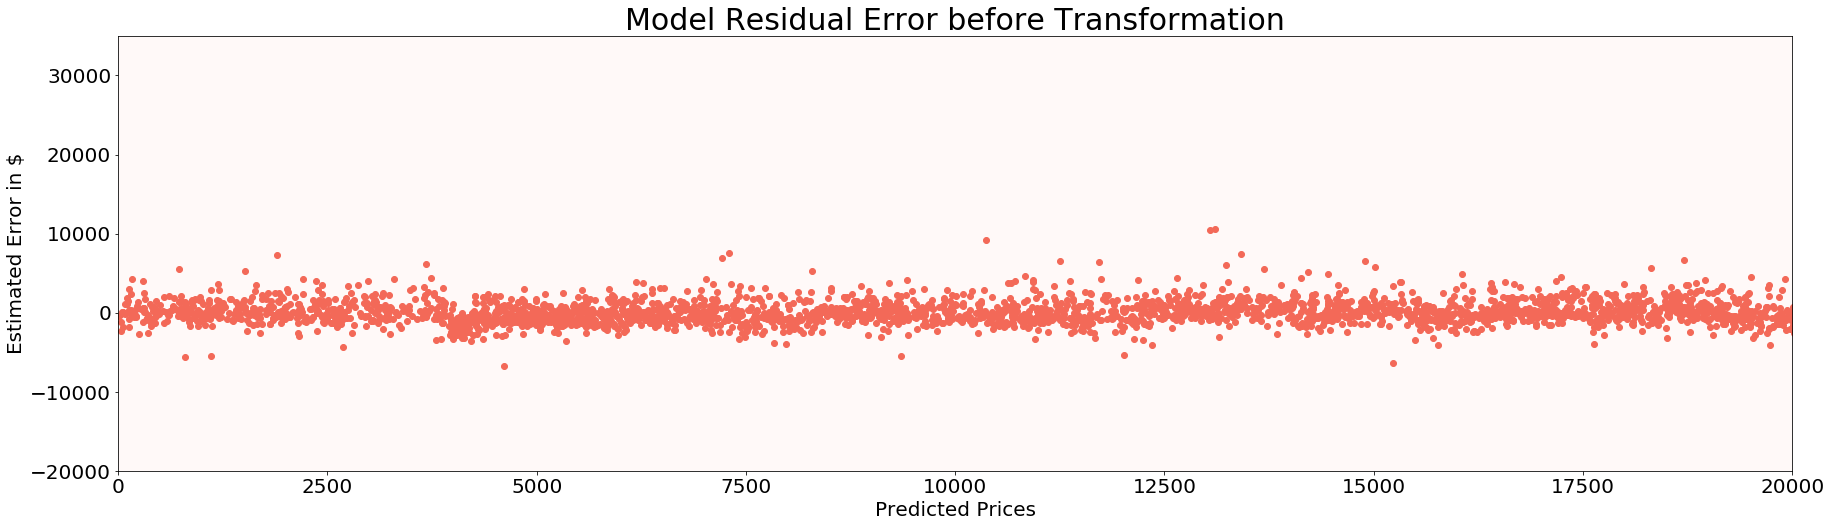

In [151]:
plt.figure(figsize=(15, 4))
plt.subplot(111, facecolor=('#FFF9F8'))
SM_LR_Model.resid.plot(style='o', figsize=(30,8),c=('#F36958'));
plt.title('Model Residual Error before Transformation',fontsize=30)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img2_residualError.jpeg')



## Sklearn Linear Regression Model

In [152]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8775015081598545

### Test Score

In [153]:
lr.score(X_test,y_test)

0.8688782348272899

In [154]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, y_train)
gbr.score(X_train,y_train)


0.9493914686989386

In [155]:
gbr.score(X_test,y_test)

0.9033164304044246

### Let's predict an observation never seen before
To do that we first build a fucntion that takes a simple user input and transform it to a one hot encoding.

In [156]:
user_input = {'milage': 1244, 'model':'Corolla' , 'make':'Toyota', 'transmission':'Automatic',
              'fuel':'Gasoline', 'Num_Cyl':4, 'year':2012, 'body_style':'Minivan'}

In [157]:
inputed = pd.DataFrame([user_input])
test_df = cleaned_df.append(inputed, ignore_index=True, sort=True)
test_df.head()

Num_Cyl body_style      fuel    make  milage    model    price  \
0        6    Minivan  Gasoline  Nissan   40347    Quest  21200.0   
1        4        Van  Gasoline  Nissan  103728    NV200  10000.0   
2        4      Sedan  Gasoline  Toyota   37792  Corolla  12918.0   
3        4      Sedan  Gasoline  Nissan  145892   Altima   4500.0   
4        4      Sedan  Gasoline   Honda   90958   Accord   8488.0   

  transmission  year  
0    Automatic  2014  
1    Automatic  2013  
2    Automatic  2015  
3    Automatic  2008  
4       Manual  2010

In [158]:
sklearn_df_test=pd.get_dummies(test_df, columns=[ 'model', 'make', 'transmission', 'fuel', 'body_style'],drop_first=True)
df_sk_x_test=sklearn_df_test.drop(['price'], axis = 1)
df_sk_x_test.tail(3)

Num_Cyl  milage  year  model_86  model_Accord  model_AccordCrosstour  \
5602        6  167442  2006         0             0                      0   
5603        4   93095  2013         0             0                      0   
5604        4    1244  2012         0             0                      0   

      model_Altima  model_Armada  model_Avalon  model_C-HR  ...  \
5602             0             0             0           0  ...   
5603             0             0             0           0  ...   
5604             0             0             0           0  ...   

      fuel_Gasoline  fuel_Hybrid  body_style_Coupe  body_style_Hatchback  \
5602              1            0                 0                     0   
5603              1            0                 0                     0   
5604              1            0                 0                     0   

      body_style_Minivan  body_style_Pickup  body_style_SUV  body_style_Sedan  \
5602                   0                  1               0                 0   
5603                   0                  0               1                 0   
5604                   1                  0               0                 0   

      body_style_Van  body_style_Wagon  
5602               0                 0  
5603               0                 0  
5604               0                 0  

[3 rows x 77 columns]

In [159]:
testing = df_sk_x_test.iloc[[-1]]
print(int(gbr.predict(testing)))


13467


In [160]:
from sklearn.externals import joblib

joblib.dump(gbr, 'model.pkl')

['model.pkl']